In [59]:
import json
import xmltodict
import pprint
import matplotlib.pyplot as plt
import math
import statistics
import os

In [94]:
class DataExplorer():
    def __init__(self, organism_name):
        self.organism_name = organism_name
        
        # find protein links and protein info
        self.data_dir = "data"
        self.data_files = os.listdir(self.data_dir + "/{}/".format(organism_name))
        
        for file in self.data_files:
            if "links" in file: self.links_file = self.data_dir + "/{}/".format(organism_name) + file
                
        for file in self.data_files:
            if "info" in file: self.info_file = self.data_dir + "/{}/".format(organism_name) + file
        
        self.filtered_names, self.unfiltered_names = self.filter_protein_names(self.make_protein_names())   
        self.adj_list = self.make_adj_list(self.make_protein_links())
        
    def make_protein_links(self):
        with open(self.links_file) as file:
            lines = []
            for line in file:
                lines.append(line.split())
            protein_links = lines
        file.close()
        
        return protein_links[1:]
    
    def make_protein_names(self):
        with open(self.info_file) as file:
            lines = []
            for line in file:
                lines.append(line.split()[0:2])
            protein_names = lines
        file.close()
        
        return protein_names[1:]
    
    def filter_protein_names(self, protein_names):
        protein_names_filtered = {}
        protein_names_unfiltered = {}

        for name in protein_names:
            protein_id, pref_name = name
            protein_names_unfiltered[protein_id] = pref_name
            prefix = protein_id[int(protein_id.index(".")) + 1 : int(protein_id.index("_"))]

            if not pref_name.startswith(prefix):
                protein_names_filtered[protein_id] = pref_name
        return protein_names_filtered, protein_names_unfiltered
    
    def make_adj_list(self, protein_links):
        protein_links_dict = {}

        for link in protein_links:
            protein_1, protein_2, score = link

            if protein_1 not in protein_links_dict: 
                protein_links_dict[protein_1] = [protein_2]
            else:
                protein_links_dict[protein_1].append(protein_2)
        
        return protein_links_dict

In [88]:
# quick test to find the most connected protein

longest_key_len = 0
longest_key = None

for i in protein_links_dict:
    if len(protein_links_dict[i]) > longest_key_len:
        longest_key_len = len(protein_links_dict[i])
        longest_key = i
        
print("Highest degree node %s (%s) with degree %d" % (
    longest_key, protein_names_unfiltered[longest_key], len(protein_links_dict[longest_key]))
     )

Highest degree node 362663.ECP_1943 (ECP_1943) with degree 1632


In [97]:
EColi = DataExplorer("ecoli")

4629 4600


Text(0.5, 0, 'Node degrees')

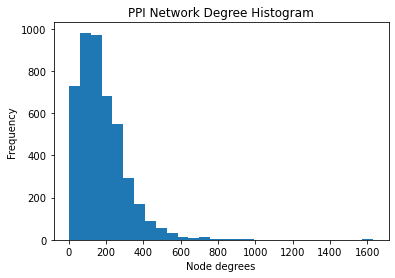

In [90]:
# get list of node degrees, plot histogram

node_degrees = [len(EColi.adj_list[i]) for i in EColi.adj_list]

n_bins = int(1 + 3.22 * math.log(len(node_degrees)))
plt.hist(node_degrees, bins = n_bins)
plt.title("PPI Network Degree Histogram")
plt.ylabel("Frequency")
plt.xlabel("Node degrees")

In [91]:
# get average node degree

degree_mean = sum(node_degrees) / len(node_degrees)
degree_median = statistics.median(node_degrees)

print("# Proteins", len(protein_names_unfiltered))
print("Degree mean: {:.3f}\n % of whole: {:.5f}%".format(
  round(degree_mean, 5), round(100 * degree_mean / len(protein_names_unfiltered), 5)  
))
print("Degree median: {:.3f}\n % of whole: {:.5f}%".format(
  round(degree_median, 5), round(100 * degree_median / len(protein_names_unfiltered), 5)  
))

# Proteins 4629
Degree mean: 176.823
 % of whole: 3.81989%
Degree median: 151.000
 % of whole: 3.26204%


In [103]:
# get graph density
max_edges = int(len(node_degrees) * (len(node_degrees) - 1) / 2)
number_edges = int(sum(node_degrees) / 2) # woah handshake lemma

print("Density: {:.3f}".format(number_edges / max_edges))


Density: 0.038
